In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [2]:
dataseta = pd.read_csv('user_a.csv', delimiter=',')
datasetb = pd.read_csv('user_b.csv', delimiter=',')
datasetc = pd.read_csv('user_c.csv', delimiter=',')
datasetd = pd.read_csv('user_d.csv', delimiter=',')
df = pd.concat([dataseta, datasetb, datasetc, datasetd], ignore_index = True)

In [3]:
df.head()

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
0,1.0,3569.164550,2063.892754,1.673726,4.444736,0.526209,3.002088,1.425022,3.302739,3563.803888,...,45.468326,72.508750,3701.186330,2182.676835,18.192418,41.349662,16.004756,42.046467,46.280843,73.565719
1,1.0,3568.423670,2063.099248,1.897790,3.728823,1.304186,1.854353,1.366575,2.546458,3563.560922,...,36.551948,66.931186,3725.210509,2180.197439,8.820788,38.012788,19.601233,29.431054,38.559351,67.470041
2,1.0,3568.157929,2062.445859,2.798014,2.574504,1.120537,1.958819,0.982433,2.258622,3563.279981,...,40.754308,66.816547,3724.417296,2176.823208,18.159202,23.612639,14.378291,19.555084,43.210004,67.781924
3,1.0,3567.710021,2062.112673,2.181775,3.610507,0.629608,2.155876,0.856275,2.233711,3562.787801,...,38.074628,63.915386,3725.822160,2177.089059,19.737616,29.484396,15.793034,25.713513,39.250246,65.031031
4,1.0,3565.546124,2063.128867,1.685161,3.384311,0.677526,1.795798,0.927924,1.909810,3562.655091,...,35.357384,64.534645,3723.053978,2167.798335,8.429414,26.374975,14.920736,35.675266,33.901687,66.956313


In [4]:
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Random Forest

In [5]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

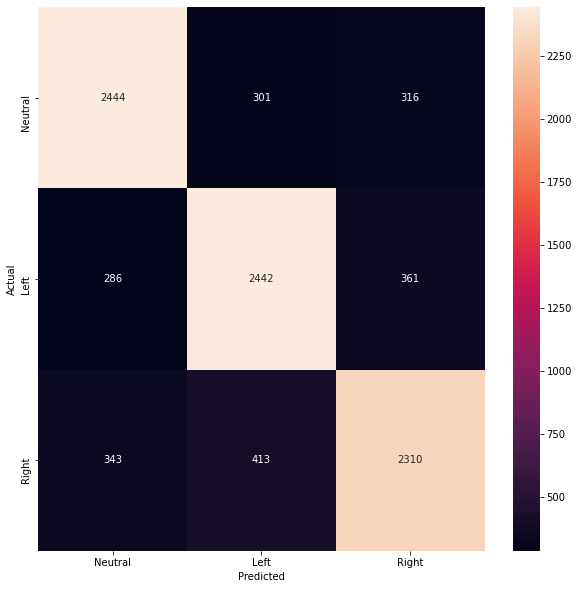

In [6]:
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)
conf_mat = confusion_matrix(y_train, predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Neutral', 'Left', 'Right'],yticklabels=['Neutral', 'Left', 'Right'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [7]:
print("Precision:", precision_score(y_train, predictions, average='micro'))
print("Recall:",recall_score(y_train, predictions, average='micro'))

Precision: 0.7808159722222222
Recall: 0.7808159722222222


# Logistic Regression

In [8]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://urldefense.proofpoint.com/v2/url?u=https-3A__scikit-2Dlearn.org_stable_modules_preprocessing.html-255Cn&d=DwIG-g&c=-35OiAkTchMrZOngvJPOeA&r=ecTSPHS-EbKJ4Wepl_myrw&m=kpkLCKNGiBqeufHjLqwVnRHEv2iN2LqSmvSbuJyKuSATEEQEUakSadQCc3IOTjBZ&s=7zwwOU88b_TfXdP5upkITmiaN-G2jH4eOocfwxh83x8&e= Please also refer to the documentation for alternative solver options:
    https://urldefense.proofpoint.com/v2/url?u=https-3A__scikit-2Dlearn.org_stable_modules_linear-5Fmodel.html-23logistic-2Dregression-255Cn&d=DwIG-g&c=-35OiAkTchMrZOngvJPOeA&r=ecTSPHS-EbKJ4Wepl_myrw&m=kpkLCKNGiBqeufHjLqwVnRHEv2iN2LqSmvSbuJyKuSATEEQEUakSadQCc3IOTjBZ&s=dCDqjx_FuB8QYadhnaT71GDCaR_UMhbLOwUdBpp-Y2I&e=   n_iter_i = _check_optimize_result(


41.08

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://urldefense.proofpoint.com/v2/url?u=https-3A__scikit-2Dlearn.org_stable_modules_preprocessing.html-255Cn&d=DwIG-g&c=-35OiAkTchMrZOngvJPOeA&r=ecTSPHS-EbKJ4Wepl_myrw&m=kpkLCKNGiBqeufHjLqwVnRHEv2iN2LqSmvSbuJyKuSATEEQEUakSadQCc3IOTjBZ&s=7zwwOU88b_TfXdP5upkITmiaN-G2jH4eOocfwxh83x8&e= Please also refer to the documentation for alternative solver options:
    https://urldefense.proofpoint.com/v2/url?u=https-3A__scikit-2Dlearn.org_stable_modules_linear-5Fmodel.html-23logistic-2Dregression-255Cn&d=DwIG-g&c=-35OiAkTchMrZOngvJPOeA&r=ecTSPHS-EbKJ4Wepl_myrw&m=kpkLCKNGiBqeufHjLqwVnRHEv2iN2LqSmvSbuJyKuSATEEQEUakSadQCc3IOTjBZ&s=dCDqjx_FuB8QYadhnaT71GDCaR_UMhbLOwUdBpp-Y2I&e=   n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/sit

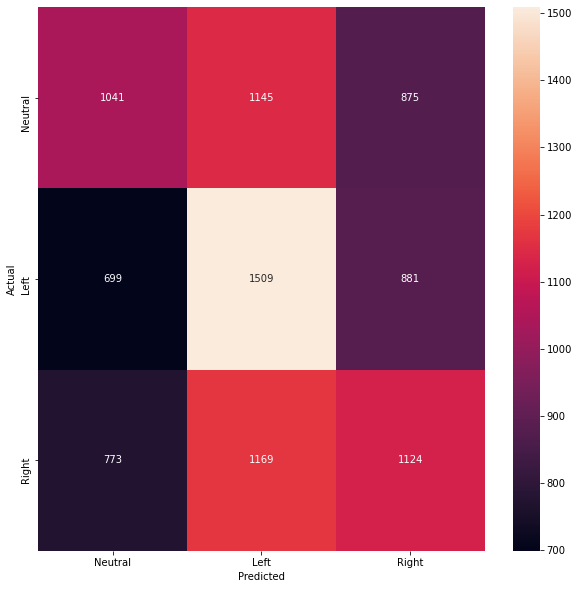

In [9]:
predictions = cross_val_predict(logreg, X_train, y_train, cv=3)
conf_mat = confusion_matrix(y_train, predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Neutral', 'Left', 'Right'],yticklabels=['Neutral', 'Left', 'Right'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [10]:
print("Precision:", precision_score(y_train, predictions, average='micro'))
print("Recall:",recall_score(y_train, predictions, average='micro'))

Precision: 0.3986545138888889
Recall: 0.3986545138888889


# KNN

In [11]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
Y_pred = knn.predict(X_test) 

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

92.37

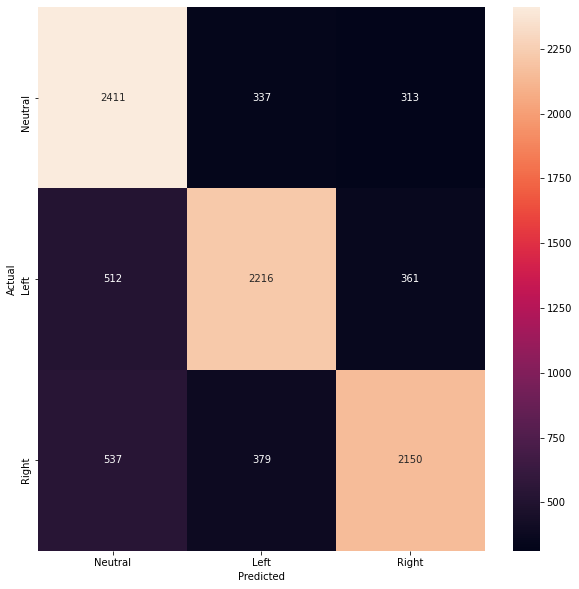

In [12]:
predictions = cross_val_predict(knn, X_train, y_train, cv=3)
conf_mat = confusion_matrix(y_train, predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Neutral', 'Left', 'Right'],yticklabels=['Neutral', 'Left', 'Right'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
print("Precision:", precision_score(y_train, predictions, average='micro'))
print("Recall:",recall_score(y_train, predictions, average='micro'))

Precision: 0.7353515625
Recall: 0.7353515625


# Naive Bayes

In [14]:
gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
Y_pred = gaussian.predict(X_test)  

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

36.78

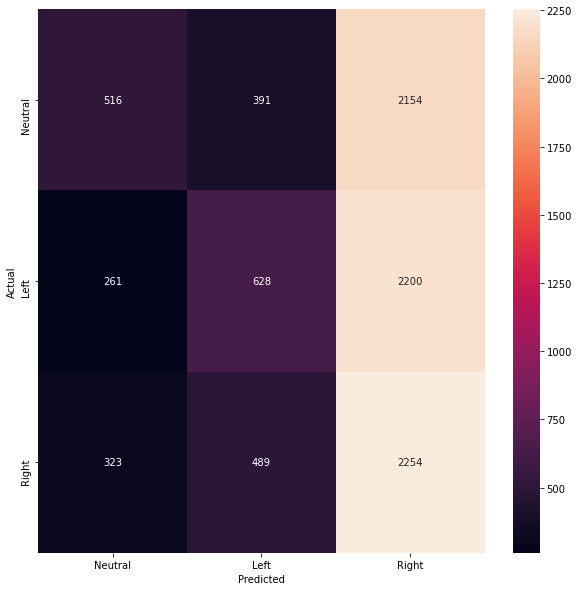

In [15]:
predictions = cross_val_predict(gaussian, X_train, y_train, cv=3)
conf_mat = confusion_matrix(y_train, predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Neutral', 'Left', 'Right'],yticklabels=['Neutral', 'Left', 'Right'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [16]:
print("Precision:", precision_score(y_train, predictions, average='micro'))
print("Recall:",recall_score(y_train, predictions, average='micro'))

Precision: 0.3687065972222222
Recall: 0.3687065972222222


# Decision Tree

In [17]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

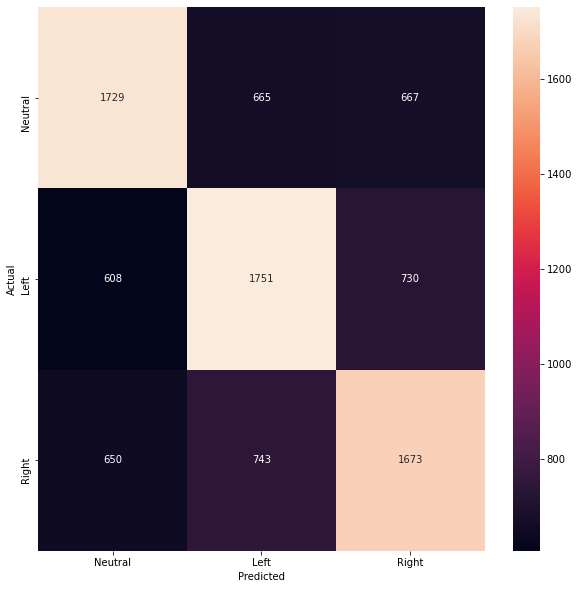

In [18]:
predictions = cross_val_predict(decision_tree, X_train, y_train, cv=3)
conf_mat = confusion_matrix(y_train, predictions)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Neutral', 'Left', 'Right'],yticklabels=['Neutral', 'Left', 'Right'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [19]:
print("Precision:", precision_score(y_train, predictions, average='micro'))
print("Recall:",recall_score(y_train, predictions, average='micro'))

Precision: 0.5591362847222222
Recall: 0.5591362847222222


In [20]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes','Decision Tree'],
    'Score': [acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
92.37,KNN
41.08,Logistic Regression
36.78,Naive Bayes
